In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import compress

import datetime
from dateutil.parser import parse

import math
import os
import copy
import pickle

## Import data

In [4]:
# Import data
import pickle
file = open('art_data.pkl','rb')
data = pickle.load(file)
file.close()

file = open('art_train.pkl','rb')
train = pickle.load(file)
file.close()

file = open('art_test.pkl','rb')
test = pickle.load(file)
file.close()

## Explore data

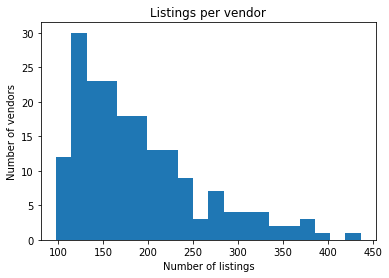

Mean  : 189.5
Median: 171.0
Max   : 436
Min   : 98


In [5]:
# Count number of listings for each vendor and create histogram
sales_by_vendor = data['vendor_name'].groupby(data['vendor_name']).count() #changed from drug_df to alldrugs
plt.hist(sales_by_vendor, bins = 20)
plt.xlabel('Number of listings')
plt.ylabel('Number of vendors')
plt.title('Listings per vendor')
plt.show()

print('Mean  :', round(np.mean(sales_by_vendor),1))
print('Median:', round(np.median(sales_by_vendor),1))
print('Max   :', round(np.max(sales_by_vendor),1))
print('Min   :', round(np.min(sales_by_vendor),1))

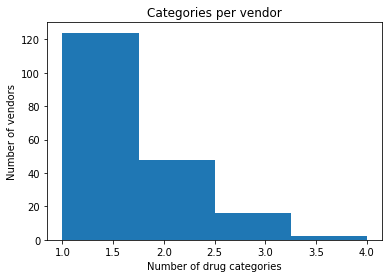

Mean  : 1.5
Median: 1.0
Max   : 4
Min   : 1


In [6]:
# Get list of vendors in dataframe
vendor_list = data['vendor_name'].unique()

# Function to count number of drugs per vendor
def countDrugsForVendor(vendor_name):
    return(len(data[data['vendor_name'] == vendor_name].groupby('drug').count().index))

# Get number of drugs sold for each vendor
vendor_drug_counts = {vendor : countDrugsForVendor(vendor) for vendor in vendor_list}

# Make histogram of vendor_drug_counts
plt.hist(vendor_drug_counts.values(), bins = 4)
plt.xlabel('Number of drug categories')
plt.ylabel('Number of vendors')
plt.title('Categories per vendor')
plt.show()

print('Mean  :', round(np.mean(list(vendor_drug_counts.values())),1))
print('Median:', round(np.median(list(vendor_drug_counts.values())),1))
print('Max   :', round(np.max(list(vendor_drug_counts.values())),1))
print('Min   :', round(np.min(list(vendor_drug_counts.values())),1))

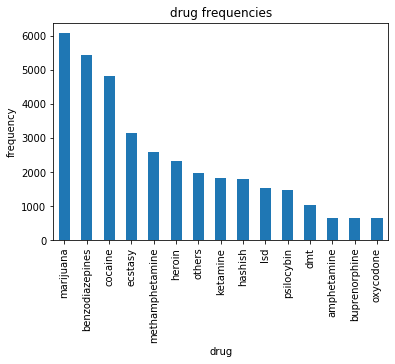

drug
marijuana          16.891667
benzodiazepines    15.100000
cocaine            13.391667
ecstasy             8.775000
methamphetamine     7.238889
heroin              6.458333
others              5.458333
ketamine            5.055556
hashish             4.972222
lsd                 4.266667
psilocybin          4.125000
dmt                 2.877778
amphetamine         1.811111
buprenorphine       1.794444
oxycodone           1.783333
Name: drug, dtype: float64


In [7]:
# Show percentage of each drug after filtering
drug_counts = data['drug'].groupby(data['drug']).count().sort_values(ascending = False)

# Plot results
drug_counts.plot(kind = 'bar')
plt.ylabel('frequency')
plt.title('drug frequencies')
plt.show()

# Print percentage of each drug
print(100*drug_counts/np.sum(drug_counts))

In [8]:
# Plot number of sellers per drug category
# Split
drug_counts = data.groupby(['drug','vendor_name'])
drug_counts.count()[drug_counts.count()>50]
# drug_counts.count().iloc[:3,:]
# Apply


# Combine

# Plot results
# drug_counts.plot(kind = 'bar')
# plt.ylabel('frequency')
# plt.title('drug frequencies')
# plt.show()

time_stamp
drug            vendor_name                    
amphetamine     Alagbada726                96.0
                CaliCartel                  NaN
                DoktorKosmos              118.0
                Express247                 87.0
                JUNY                      100.0
                MaggieThatcher             90.0
                MercenaryGB                 NaN
                deepbay                     NaN
                fantasy44                   NaN
                mrs.feelgood               86.0
benzodiazepines A1CRACK                   233.0
                Alagbada726               103.0
                CaptainPirate             212.0
                Cash_King                 148.0
                ChemicalConnection        108.0
                ChillChem                 109.0
                DDUK-NDD                  367.0
                Discover                  119.0
                EPharma                    95.0
                Hyperamigo                240.0
                JUNY                        NaN
                KingPharma                173.0
                LiLXanax                  135.0
                LySanDerspooner           198.0
                MaggieThatcher            215.0
                Multi                       NaN
                NELIZ                     173.0
                NordicBars                171.0
                StealthPharmacy           346.0
                TanteEmma2018              51.0
...                                         ...
methamphetamine speedzone                 228.0
                sthompson                 253.0
                th3professionals            NaN
others          Americansteroids          183.0
                EPharma                    55.0
                Gladyman                  187.0
                Multi                     132.0
                PHARMALABS                195.0
                RealPharmaceuticals         NaN
                StealthPharmacy             NaN
                TanteEmma2018              54.0
                ausroids.is               163.0
                bangalow                  319.0
                cashcow72                 319.0
                clawedfeats                88.0
                einsteingroup             106.0
                thatsteroidguy            119.0
oxycodone       DrOxy                     149.0
                JUNY                        NaN
                PILLSandWHITE               NaN
                RealPharmaceuticals       104.0
                largomonkey               178.0
                mrs.feelgood              146.0
psilocybin      KungMarkatta              276.0
                Perfect.Shrooms           346.0
                TheWisdomGoddess          124.0
                ash_williams              201.0
                fun-gee                   168.0
                highadventure             146.0
                sunshining                224.0

[276 rows x 1 columns]

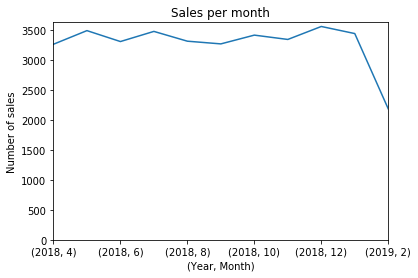

In [9]:
data['time_stamp'].groupby([data['time_stamp'].dt.year, data['time_stamp'].dt.month]).count().plot()
plt.xlabel('(Year, Month)')
plt.ylabel('Number of sales')
plt.title('Sales per month')
plt.ylim(bottom = 0)
plt.show()

In [10]:
data.head()

,time_stamp,vendor_name,drug
0,2018-04-01 00:05:48.294780,Mastery,cocaine
1,2018-04-01 00:06:05.136732,LySanDerspooner,benzodiazepines
2,2018-04-01 00:17:06.166890,ChillChem,ecstasy
3,2018-04-01 00:36:24.117651,Only_dmt_from_tj,dmt
4,2018-04-01 00:38:08.899730,BlackSheepSquadron,buprenorphine
